In [59]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [60]:
v_t = np.loadtxt('../data/quadrature_debug/v_t.txt')
b = np.loadtxt('../data/quadrature_debug/b.txt')
w0 = np.loadtxt('../data/quadrature_debug/w0.txt')
#w = np.loadtxt('../w.txt')
#points = np.loadtxt('../points.txt')
# r = v_t.dot(w) - b
# np.linalg.norm(r)

In [61]:
import gurobipy as gp
from gurobipy import GRB

In [ ]:
try:
    num_vars = v_t.shape[1]
    num_constraints = v_t.shape[0]
    V = sum(w0)
    
    # Create a new model
    model = gp.Model("milp")

    w_vars = [ model.addVar(vtype=GRB.CONTINUOUS, name="w_{}".format(i)) for i in range(0, num_vars)]
    b_vars = [ model.addVar(vtype=GRB.BINARY, obj=1, name="b_{}".format(i)) for i in range(0, num_vars)]
    
    model.addMConstrs(v_t, w_vars, '=', b)
    
    for i in range(0, num_vars):
        model.addConstr(w_vars[i] <= V * b_vars[i])
    

#     # TODO: Add P constraints
#     def create_V_t_row_constraint(V_t, b, i):
#         constraint = solver.Constraint(b[i], b[i], 'V_t_{}'.format(i))
#         for j in range(0, num_vars):
#             constraint.SetCoefficient(w_vars[j], V_t[i, j])

#     for j in range(0, num_vars):
#         constraint = solver.Constraint(-solver.infinity(), 0, "w_b_{}".format(j))
#         constraint.SetCoefficient(w_vars[j], 1)
#         constraint.SetCoefficient(b_vars[j], -V)

#     P_constraints = [ create_V_t_row_constraint(v_t, b, i) for i in range(0, num_constraints) ]
#     objective = solver.Objective()
#     for b_i in b_vars:
#         objective.SetCoefficient(b_i, 1)

#     solver.EnableOutput()
#     print(solver.Solve())
#     objective.Value()

#     w_glop = np.array([ w_i.solution_value() for w_i in w_vars ])
#     b_glop = np.array([ b_i.solution_value() for b_i in b_vars ])

#     r = v_t.dot(w_glop) - b
#     print(np.linalg.norm(r))


#     # Create variables
#     x = m.addVar(vtype=GRB.BINARY, name="x")
#     y = m.addVar(vtype=GRB.BINARY, name="y")
#     z = m.addVar(vtype=GRB.BINARY, name="z")

#     # Set objective
#     m.setObjective(x + y + 2 * z, GRB.MAXIMIZE)

#     # Add constraint: x + 2 y + 3 z <= 4
#     m.addConstr(x + 2 * y + 3 * z <= 4, "c0")

#     # Add constraint: x + y >= 1
#     m.addConstr(x + y >= 1, "c1")

    # Optimize model
    model.optimize()
    
    w_gurobi = np.array([w.x for w in w_vars])
    b_gurobi = np.array([b.x for b in b_vars])

#     for v in m.getVars():
#         print('%s %g' % (v.varName, v.x))

#     print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError as e:
    print('Encountered an attribute error: ' + str(e))

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
Optimize a model with 29365 rows, 58158 columns and 8374752 nonzeros
Model fingerprint: 0xf83f86e1
Variable types: 29079 continuous, 29079 integer (29079 binary)
Coefficient statistics:
  Matrix range     [1e-11, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-06, 1e-02]
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve time: 9.01s
Presolved: 29365 rows, 58158 columns, 8374705 nonzeros
Variable types: 29079 continuous, 29079 integer (29079 binary)

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.076e+04
 Factor NZ  : 4.104e+04 (roughly 10 MBytes of memory)
 Factor Ops : 7.839e+06 (less than 1 second per iteration)
 Threads    : 2

                  Objective                Residual
Iter       Primal          Dual        

     0     0    1.32048    0  303  282.00000    1.32048   100%     - 4531s
     0     0    1.32213    0  305  282.00000    1.32213   100%     - 4556s
     0     0    1.33046    0  306  282.00000    1.33046   100%     - 4587s
     0     0    1.33268    0  307  282.00000    1.33268   100%     - 4611s
     0     0    1.33270    0  307  282.00000    1.33270   100%     - 4643s
     0     0    1.33454    0  309  282.00000    1.33454   100%     - 4665s
     0     0    1.33951    0  310  282.00000    1.33951   100%     - 4700s
     0     0    1.34221    0  309  282.00000    1.34221   100%     - 4723s
     0     0    1.37753    0  309  282.00000    1.37753   100%     - 4762s
     0     0    1.38076    0  310  282.00000    1.38076   100%     - 4784s
     0     0    1.38240    0  307  282.00000    1.38240   100%     - 4814s
     0     0    1.38428    0  306  282.00000    1.38428   100%     - 4838s
     0     0    1.39869    0  311  282.00000    1.39869   100%     - 4875s
     0     0    1.40071  

In [ ]:
num_nonzero_gurobi = len([w_i for w_i in w_gurobi if w_i > 1e-14])
print("Num nonzero gurobi: {}".format(num_nonzero_gurobi))

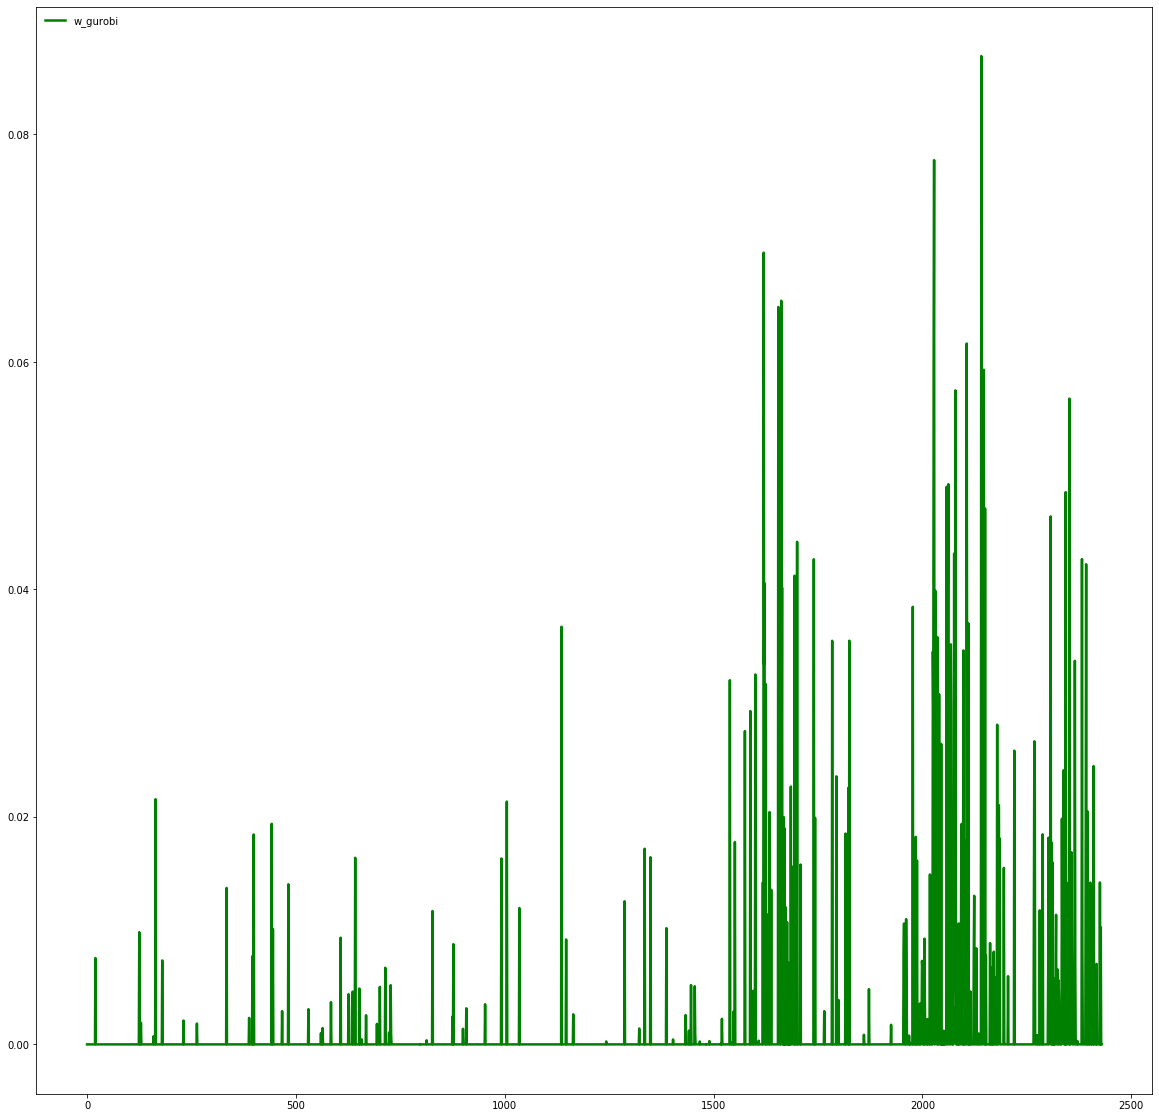

In [58]:
plt.figure(figsize=(20,20))
plt.plot(w_gurobi, color="green",  linewidth=2.5, linestyle="-", label="w_gurobi")
# plt.plot(b_gurobi, color="blue",  linewidth=2.5, linestyle="-", label="b_gurobi")
plt.legend(loc='upper left', frameon=False)
plt.show()

In [3]:
# Try the same thing with Google's GLOP solver
from ortools.linear_solver import pywraplp

In [ ]:
# num_vars = v_t.shape[1]
# num_constraints = v_t.shape[0]
# V = sum(w0)
# solver = pywraplp.Solver('quadrature_lp', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# w_vars = [ solver.NumVar(0.0, float("inf"), "w_{}".format(i)) for i in range(0, num_vars)]
# b_vars = [ solver.IntVar(0.0, 1.0, "b_{}".format(i)) for i in range(0, num_vars)]

# # TODO: Add P constraints
# def create_V_t_row_constraint(V_t, b, i):
#     constraint = solver.Constraint(b[i], b[i], 'V_t_{}'.format(i))
#     for j in range(0, num_vars):
#         constraint.SetCoefficient(w_vars[j], V_t[i, j])
        
# for j in range(0, num_vars):
#     constraint = solver.Constraint(-solver.infinity(), 0, "w_b_{}".format(j))
#     constraint.SetCoefficient(w_vars[j], 1)
#     constraint.SetCoefficient(b_vars[j], -V)
        
# P_constraints = [ create_V_t_row_constraint(v_t, b, i) for i in range(0, num_constraints) ]
# objective = solver.Objective()
# for b_i in b_vars:
#     objective.SetCoefficient(b_i, 1)

# solver.EnableOutput()
# print(solver.Solve())
# objective.Value()

# w_glop = np.array([ w_i.solution_value() for w_i in w_vars ])
# b_glop = np.array([ b_i.solution_value() for b_i in b_vars ])

# r = v_t.dot(w_glop) - b
# print(np.linalg.norm(r))

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(w_glop, color="green",  linewidth=2.5, linestyle="-", label="w_glop")
plt.plot(b_glop, color="blue",  linewidth=2.5, linestyle="-", label="b_glop")
plt.legend(loc='upper left', frameon=False)
plt.show()

In [ ]:
num_nonzero_glop = len([w_i for w_i in w_glop if w_i > 1e-14])
print("Num nonzero glop: {}".format(num_nonzero_glop))

In [ ]:
# from bokeh.plotting import figure, show, output_file, output_notebook
# from math import sqrt, pi

# output_notebook()

# def plot_points(points, weights):
#     x = points[:, 0]
#     y = points[:, 1]
#     print(sum(weights))
#     radii = [ sqrt(w_i / pi) for w_i in weights ]
#     colors = [
#         "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
#     ]

#     TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

#     p = figure(tools=TOOLS)

#     p.scatter(x, y, radius=radii,
#               fill_color=colors, fill_alpha=0.6,
#               line_color=None)

#     show(p)